In [53]:
# 数据提取与预处理
import pandas as pd
import numpy as np

trn_path = "/home/nekozo/vscode/#programs/machine_learning/work1/data/Data/poly_reg/train_dataset.csv"
val_path = "/home/nekozo/vscode/#programs/machine_learning/work1/data/Data/poly_reg/test_dataset.csv"
# 训练集数据处理
df_trn = pd.read_csv(trn_path, header=0)
x_trn = df_trn['x'].values.reshape(-1, 1)
y_trn = df_trn['y'].values

# 验证集数据处理，与训练集处理方式保持一致
df_val = pd.read_csv(val_path, header=0)
x_val = df_val['x'].values.reshape(-1, 1)
y_val = df_val['y'].values

# print(x_trn)

In [54]:
from sklearn.preprocessing import PolynomialFeatures

# 多项式阶数
degree = 2
# 转换器
poly = PolynomialFeatures(degree=degree)

# 转换特征
x_trn_poly = poly.fit_transform(x_trn)
x_val_poly = poly.transform(x_val)

In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# 训练模型
model.fit(x_trn_poly, y_trn)

LinearRegression()

In [59]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_val_poly)
mse = mean_squared_error(y_val, y_pred)
print(f"MSE Error: {mse}")

MSE Error: 0.48883668754145765


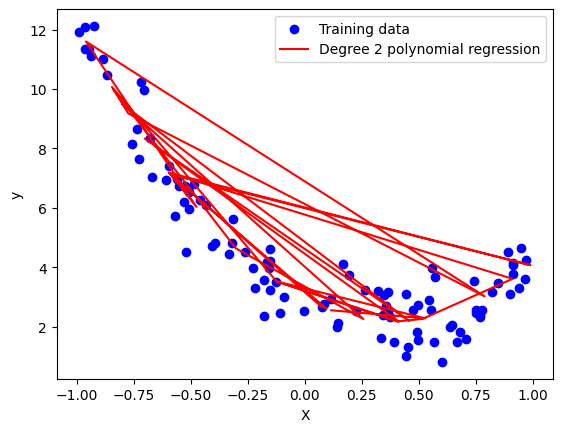

In [57]:
import matplotlib.pyplot as plt

plt.scatter(x_trn, y_trn, color='blue', label='Training data')
plt.plot(x_val, y_pred, color='red', label=f'Degree {degree} polynomial regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [58]:
# 获取模型的系数
coefficients = model.coef_
intercept = model.intercept_

# 构造多项式表达式字符串
polynomial_expression = f"{intercept}"  # 截距项

for i, coef in enumerate(coefficients, start=1):
    term = f"{coef:.3f}*x^{i}" if coef != 0 else ''  # 去除系数为0的项
    polynomial_expression += (' + ' + term if term else '')

print(f"多项式回归模型对应的多项式表达式为: {polynomial_expression}")

多项式回归模型对应的多项式表达式为: 2.9408127516015634 + -4.009*x^2 + 5.207*x^3
